In [1]:
%%capture capt
!pip install matplotlib torchsummary scikit-learn pandas
!pip install -U imbalanced-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms, models
from torchsummary import summary

from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import LeaveOneGroupOut

In [3]:
from gilbert2d import gilbert2d

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Model running on {device}.")

Model running on cuda.


## Data Loading

In [5]:
CLASSES = ["asymetric", "banded", "locked", "butterfly", "no_pattern"]

In [6]:
# Mapping int to categories
int_to_cat = {
    0: "asymetric",
    1: "banded",
    2: "locked",
    3: "butterfly",
    4: "no_pattern",
}

In [7]:
X_train = np.load("./data/X_train.npy")
y_train_df = pd.read_csv("./data/y_train.csv")

In [8]:
X_test = np.load("./data/X_test.npy")
y_test_df = pd.read_csv("./data/y_test.csv")

## Mean and var

In [65]:
def mean_and_var(X):
    arr = np.zeros((len(X), 2))
    for i, x in enumerate(X):
        arr[i] = np.array([x.mean(), np.quantile(x, 0.75)])
    return arr

In [66]:
mean_and_var__train = mean_and_var(X_train)
mean_and_var__test = mean_and_var(X_test)

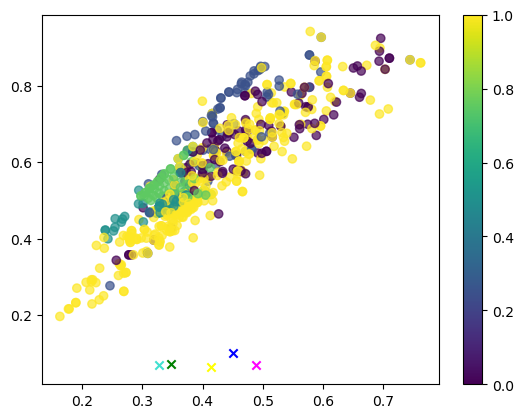

In [67]:
plt.scatter(mean_and_var__train[:, 0], mean_and_var__train[:, 1], c=y_train_df.cat_num.values, alpha=0.7)
c = {}
c[0] = "magenta"
c[1] = 'blue'
c[2] = 'turquoise'
c[3] = 'green'
c[4] = 'yellow'

for class_ in range(5):
    mean = X_train[y_train_df.cat_num.values == class_].mean()
    var = X_train[y_train_df.cat_num.values == class_].var()
    plt.scatter(mean, var, marker='x', c=c[class_])
plt.colorbar()

In [70]:
from PIL import Image
from scipy import ndimage

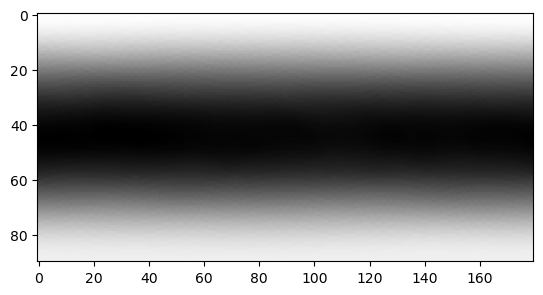

In [79]:
plt.imshow((255*X_train[0]).astype(int), cmap='gray')

In [91]:
centers = np.array([list(ndimage.center_of_mass(x)) for x in X_train])

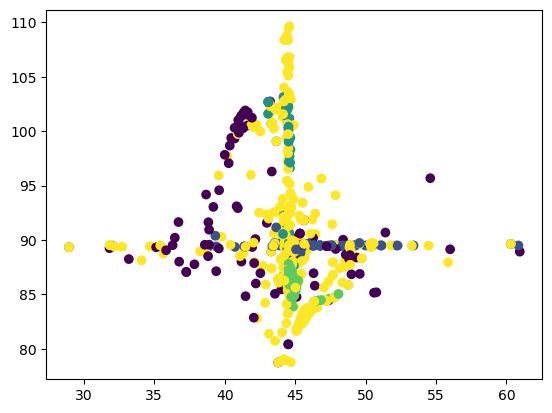

In [94]:
plt.scatter(centers[:,0], centers[:,1], c=y_train_df.cat_num.values)